In [3]:
!pip install geopandas

In [33]:
def hanging_line(point1, point2):
    import numpy as np

    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b

    return (x,y)

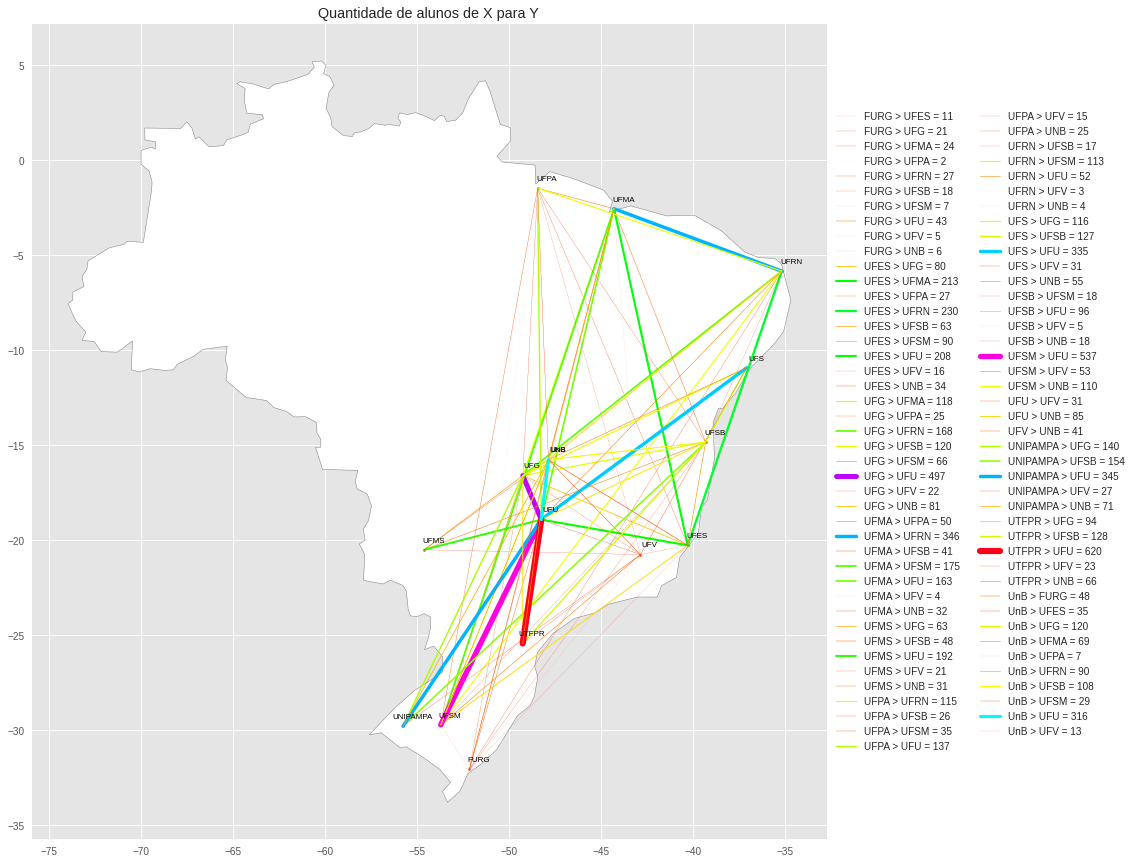

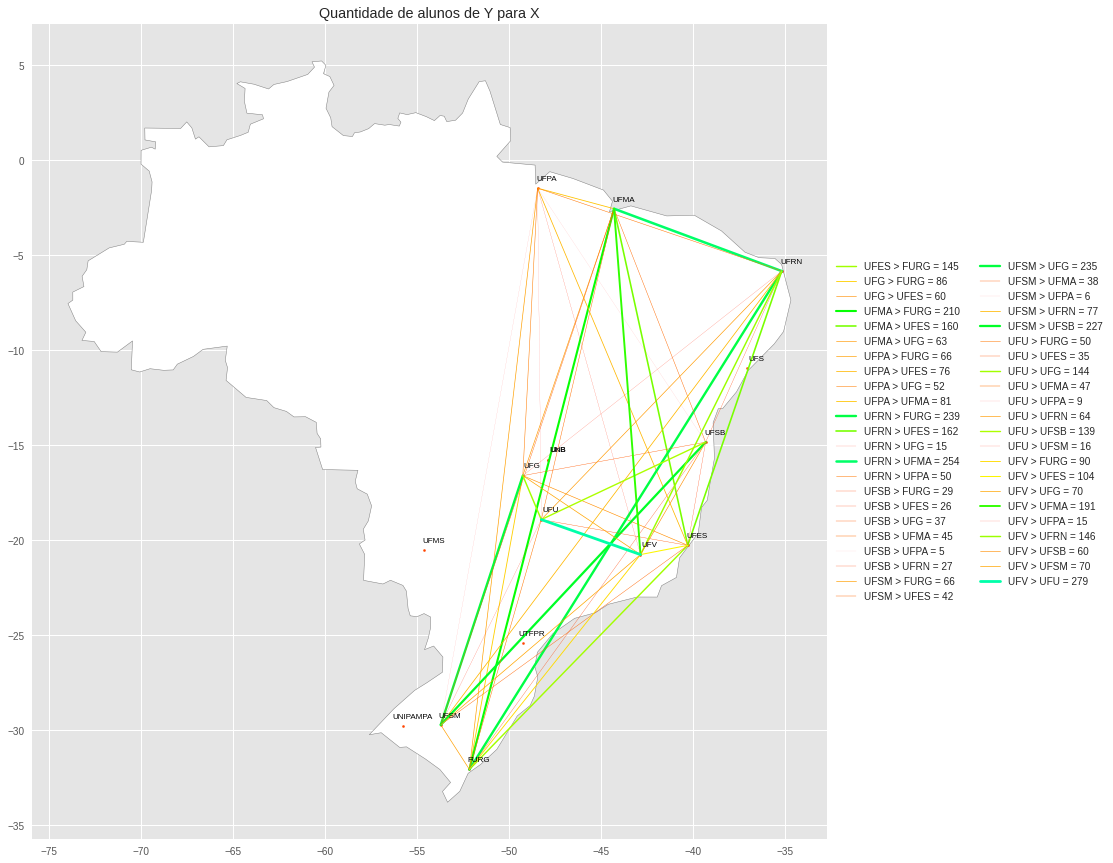

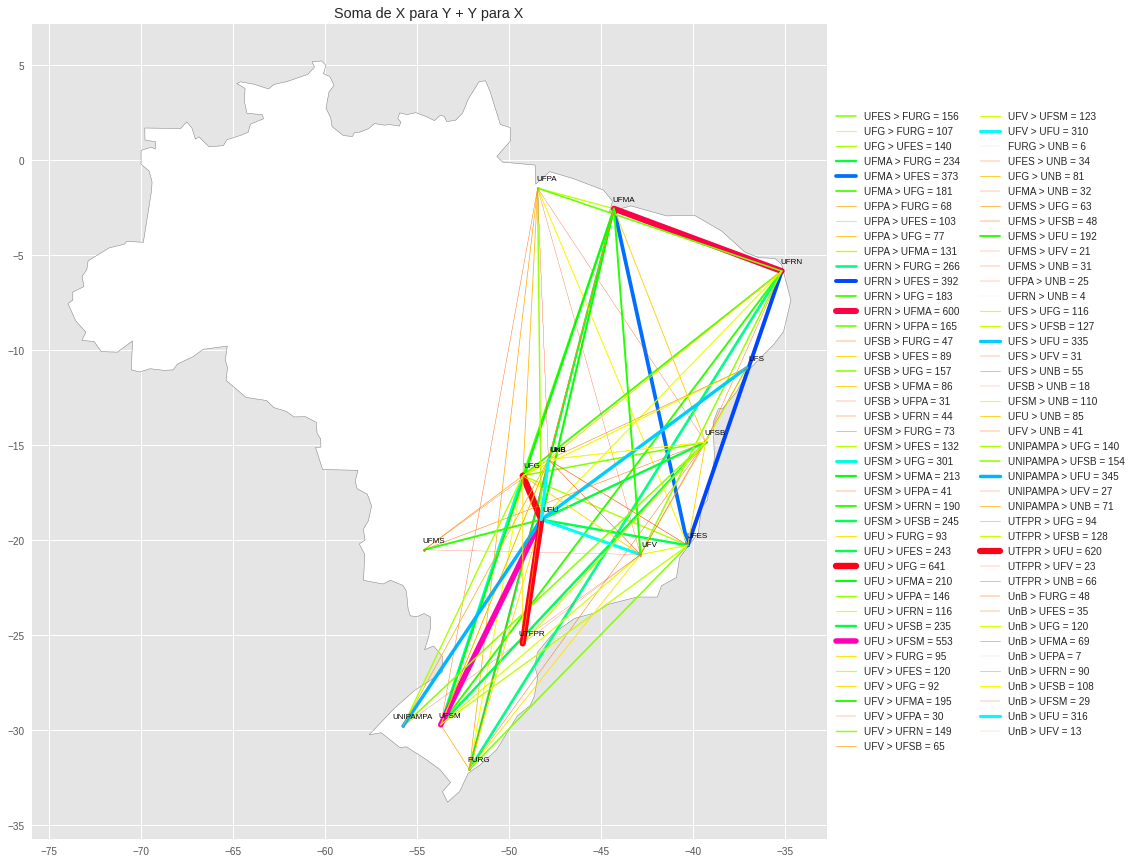

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.cm as cm
import numpy as np
intercambio = pd.read_csv("promover.csv")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

coordenadas = {
        "UFSM":        { "lat": -29.72136293372774, "lon": -53.71793081955741},
        "UFMA":        { "lat":-2.5583100642071073, "lon":-44.30889389982728},
        "UFG":         { "lat":-16.606116748302938, "lon":-49.2612768038741},
        "UFES":        { "lat":-20.276114488612805, "lon":-40.304768059871456},
        "UFV":         { "lat": -20.760848578075382, "lon":-42.87017393080441},
        "UTFPR":       { "lat":-25.438116495664577, "lon":-49.26802832344485},
        "UFRN":        { "lat": -5.840380528369514, "lon":-35.20017770632764},
        "UnB":         { "lat": -15.762908150608828, "lon":-47.870624593590435},
        "UNB":         { "lat": -15.762908150608828, "lon":-47.870624593590435},
        "UNIPAMPA":    { "lat": -29.789320182407522, "lon":-55.7682323214076},
        "UFS":         { "lat": -10.926330421896036, "lon":-37.102378632415224},
        "UFPA":        { "lat": -1.4756472933790439, "lon":-48.45708415422008},
        "UFU":         { "lat": -18.91838615676567, "lon":-48.25762224208926},
        "UFMS":        { "lat": -20.50432780091514, "lon":-54.6139844783919},
        "UFSB":        { "lat": -14.843365719499868, "lon":-39.33355476394096},
        "FURG":        { "lat": -32.06796570534503, "lon":-52.16112613080967}
}

with plt.style.context(("seaborn", "ggplot")):
  vem = {}
  vai = {}
  for orig, dest, tam in zip(intercambio["origem_aluno"], intercambio["destino_aluno"], intercambio["inscricao"]):
    if vem.get((dest, orig)) == None:
      vem[(orig, dest)] = tam
    else:
      vai[(orig, dest)] = tam
  
  world[world.name == "Brazil"].plot(figsize=(15,15), edgecolor="grey", color="white");
  for ifes in coordenadas:
        plt.scatter( coordenadas[ifes]["lon"], coordenadas[ifes]["lat"], color="orangered", alpha=1, s=4)
        plt.text(coordenadas[ifes]["lon"]+0.5, coordenadas[ifes]["lat"]+0.5, ifes, fontsize=8, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
  
  for orig, dest in vem:
    slon = coordenadas[orig]["lon"]
    slat = coordenadas[orig]["lat"]
    dlon = coordenadas[dest]["lon"]
    dlat = coordenadas[dest]["lat"]
    tam = vem.get((orig, dest))
    
    plt.plot([slon, dlon], [slat,dlat], label=orig + ' > ' + dest +' = '+ str(tam), 
             linewidth=tam/100, 
             color=cm.hsv(tam/intercambio["inscricao"].max()), 
             alpha=1)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
  plt.title('Quantidade de alunos de X para Y')
  plt.show() 

  world[world.name == "Brazil"].plot(figsize=(15,15), edgecolor="grey", color="white");
  for ifes in coordenadas:
        plt.scatter( coordenadas[ifes]["lon"], coordenadas[ifes]["lat"], color="orangered", alpha=1, s=4)
        plt.text(coordenadas[ifes]["lon"]+0.5, coordenadas[ifes]["lat"]+0.5, ifes, fontsize=8, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
  
  for orig, dest in vai:
    slon = coordenadas[orig]["lon"]
    slat = coordenadas[orig]["lat"]
    dlon = coordenadas[dest]["lon"]
    dlat = coordenadas[dest]["lat"]
    tam = vai.get((orig, dest))
    
    plt.plot([slon, dlon], [slat,dlat], label=orig + ' > ' + dest +' = '+ str(tam), 
             linewidth=tam/100, 
             color=cm.hsv(tam/intercambio["inscricao"].max()), 
             alpha=1)
  
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
  plt.title('Quantidade de alunos de Y para X')
  plt.show()

  world[world.name == "Brazil"].plot(figsize=(15,15), edgecolor="grey", color="white");
  for ifes in coordenadas:
        plt.scatter( coordenadas[ifes]["lon"], coordenadas[ifes]["lat"], color="orangered", alpha=1, s=4)
        plt.text(coordenadas[ifes]["lon"]+0.5, coordenadas[ifes]["lat"]+0.5, ifes, fontsize=8, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
  
  for orig, dest in vai:
    if vem.get((dest, orig)) != None:
      tam = vai.get((orig, dest)) + vem.get((dest, orig))
      del vem[(dest, orig)]
    else:
      tam = vai.get((orig, dest))
    
    slon = coordenadas[orig]["lon"]
    slat = coordenadas[orig]["lat"]
    dlon = coordenadas[dest]["lon"]
    dlat = coordenadas[dest]["lat"]
    
    plt.plot([slon, dlon], [slat,dlat], label=orig + ' > ' + dest +' = '+ str(tam), 
             linewidth=tam/100, 
             color=cm.hsv(tam/intercambio["inscricao"].max()), 
             alpha=1)
    
  for orig, dest in vem:
    slon = coordenadas[orig]["lon"]
    slat = coordenadas[orig]["lat"]
    dlon = coordenadas[dest]["lon"]
    dlat = coordenadas[dest]["lat"]
    tam = vem.get((orig, dest))
    
    plt.plot([slon, dlon], [slat,dlat], label=orig + ' > ' + dest +' = '+ str(tam), 
             linewidth=tam/100, 
             color=cm.hsv(tam/intercambio["inscricao"].max()), 
             alpha=1)
    
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
  plt.title('Soma de X para Y + Y para X')
  plt.show()